In [1]:
#IMPORTS

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from math import sqrt

from sklearn.metrics import mean_absolute_error as mae
from sklearn.metrics import mean_squared_error as mse

In [2]:
# READ IN PATH DATA
path = pd.read_csv("path.csv")
print(path.head(122))


     Unnamed: 0  index       x_pth       y_pth         z_pth  \
0             0    177  450.000000  700.000000  1.136868e-13   
1             1    178  450.000000  700.000000  0.000000e+00   
2             2    179  450.000000  700.000000  0.000000e+00   
3             3    180  450.000000  700.000000  0.000000e+00   
4             4    181  450.000000  700.000000  0.000000e+00   
..          ...    ...         ...         ...           ...   
117         117    294  450.000000  700.000000  0.000000e+00   
118         118    295  450.000000  700.000000  0.000000e+00   
119         119    296  450.000000  700.000000  0.000000e+00   
120         120    297  452.904966  699.539899  0.000000e+00   
121         121    298  464.524829  697.699493  0.000000e+00   

                   t_pth  
0    1633969004350000000  
1    1633969004400000000  
2    1633969004450000000  
3    1633969004500000000  
4    1633969004550000000  
..                   ...  
117  1633969010200000000  
118  1633969010

In [3]:
# READ IN TRACKER DATA
tracker = pd.read_csv("tracker.csv")
print(tracker.head(500))

     Unnamed: 0  index      x_trk      y_trk        z_trk                t_trk
0             0   3180 -36.507133 -40.170982 -2915.784424  1633969004633871000
1             1   3181 -36.543438 -40.260765 -2915.713623  1633969004648860000
2             2   3182 -36.645119 -40.364326 -2915.732910  1633969004662330000
3             3   3183 -36.709301 -40.413754 -2915.772949  1633969004674115000
4             4   3184 -36.720108 -40.421989 -2915.788086  1633969004687849000
..          ...    ...        ...        ...          ...                  ...
495         495   3675 -48.926826 -26.074509 -2961.823486  1633969011236526000
496         496   3676 -48.870758 -26.074509 -2961.822021  1633969011247954000
497         497   3677 -48.848335 -26.070332 -2961.819824  1633969011260401000
498         498   3678 -48.854256 -26.070070 -2961.825684  1633969011275453000
499         499   3679 -48.875694 -26.077665 -2961.834717  1633969011287840000

[500 rows x 6 columns]


In [4]:
# GET NUMPY ARRAYS OF IMPORTANT DATA

# path data
pth_x = path["x_pth"].to_numpy()
pth_y = path["y_pth"].to_numpy()
pth_z = path["z_pth"].to_numpy()
pth_t = path["t_pth"].to_numpy()

# tracker data
trk_x = tracker["x_trk"].to_numpy()
trk_y = tracker["y_trk"].to_numpy()
trk_z = tracker["z_trk"].to_numpy()
trk_t = tracker["t_trk"].to_numpy()



In [5]:
merged = pd.merge_asof(path, tracker, left_on='t_pth', right_on='t_trk', direction='nearest')

# path data
pth_x_m = merged["x_pth"].to_numpy()
pth_y_m = merged["y_pth"].to_numpy()
pth_z_m = merged["z_pth"].to_numpy()
pth_t_m = merged["t_pth"].to_numpy()

# tracker data
trk_x_m = merged["x_trk"].to_numpy()
trk_y_m = merged["y_trk"].to_numpy()
trk_z_m = merged["z_trk"].to_numpy()
trk_t_m = merged["t_trk"].to_numpy()

# no longer need pd dataframes 
del path, tracker

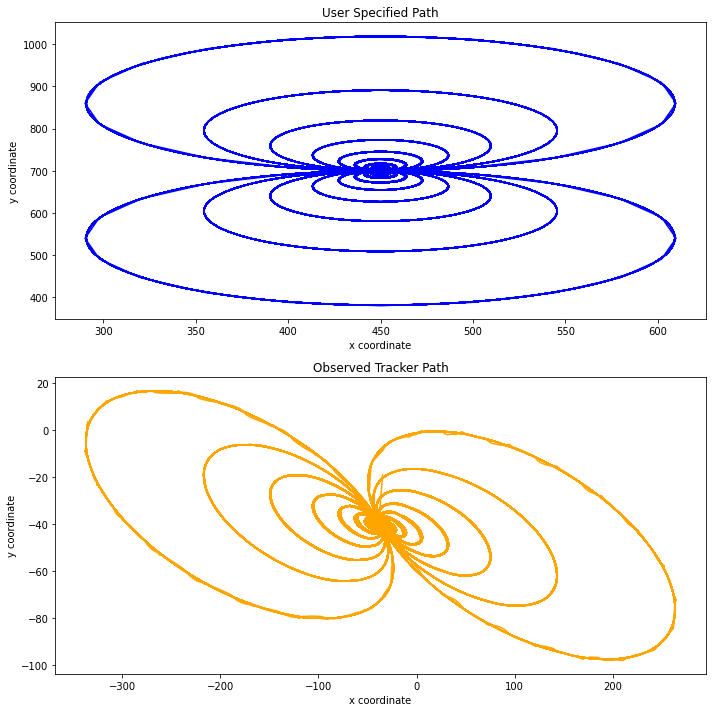

In [76]:
# EXPLORE DESIRED SPECIFIED PATH AND OBSERVED TRACKED PATH

figure, axes = plt.subplots(2,1, figsize=(10,10))

plt1 = axes[0]
plt1.plot(pth_x, pth_y, c='blue')
plt1.set_xlabel('x coordinate')
plt1.set_ylabel('y coordinate')
plt1.set_title('User Specified Path')

plt2 = axes[1]
plt2.plot(trk_x, trk_y, c='orange')
plt2.set_xlabel('x coordinate')
plt2.set_ylabel('y coordinate')
plt2.set_title('Observed Tracker Path')

plt.tight_layout()
plt.show()


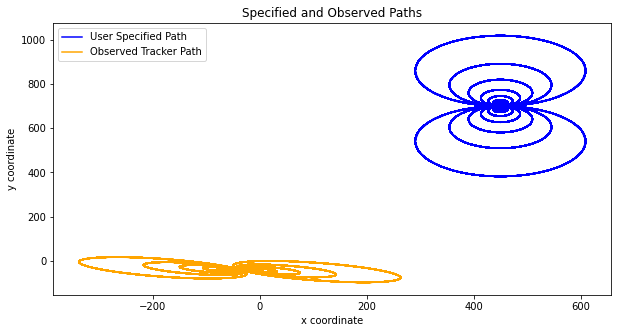

In [82]:
figure, ax = plt.subplots(1,1, figsize=(10,5))

ax.plot(pth_x, pth_y, c='blue', label='User Specified Path')
ax.plot(trk_x, trk_y, color='orange', label='Observed Tracker Path')
ax.set_xlabel('x coordinate')
ax.set_ylabel('y coordinate')
ax.set_title('Specified and Observed Paths')
ax.legend()
plt.show()

# Path Paths

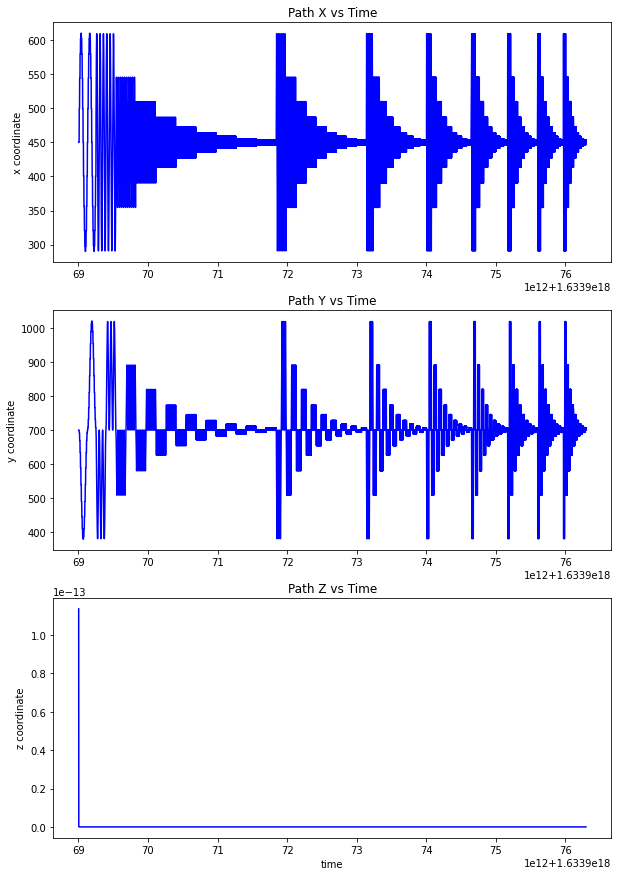

In [98]:
# EXPLROE SPECIFIED PATH VS TIME

fig, ax = plt.subplots(3,1, figsize=(10,15))

plt1 = ax[0]
plt1.plot(pth_t, pth_x, c='blue')
plt1.set_ylabel('x coordinate')
plt1.set_title('Path X vs Time')

plt2 = ax[1]
plt2.plot(pth_t, pth_y, c='blue')
plt2.set_ylabel('y coordinate')
plt2.set_title('Path Y vs Time')

plt3 = ax[2]
plt3.plot(pth_t, pth_z, c='blue')
plt3.set_xlabel('time')
plt3.set_ylabel('z coordinate')
plt3.set_title('Path Z vs Time')
plt.show()

# Tracker Paths

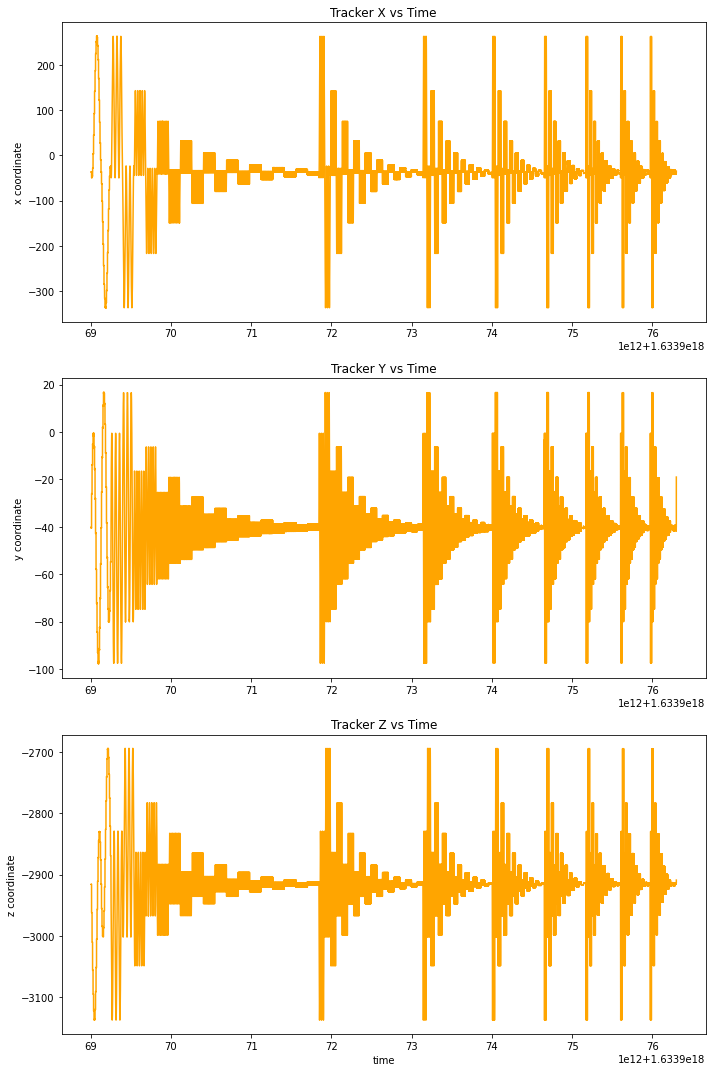

In [95]:
# EXPLORE TRACKER COORDINATES VS TIME
fig, ax = plt.subplots(3, 1, figsize=(10,15))

plt1 = ax[0]
plt1.plot(trk_t, trk_x, c='orange')
plt1.set_ylabel('x coordinate')
plt1.set_title('Tracker X vs Time')

plt2 = ax[1]
plt2.plot(trk_t, trk_y, c='orange')
plt2.set_ylabel('y coordinate')
plt2.set_title('Tracker Y vs Time')

plt3 = ax[2]
plt3.plot(trk_t, trk_z, c='orange')
plt3.set_xlabel('time')
plt3.set_ylabel('z coordinate')
plt3.set_title('Tracker Z vs Time')


plt.tight_layout()
plt.show()

In [49]:
path_size = pth_t.size
tracker_size = trk_t.size
size_ratio = tracker_size / path_size

num_points = 50000
trk_num_points = round(num_points*size_ratio)

x_translation = pth_x[0] - trk_x[0]
y_translation = pth_y[0] - trk_y[0]
z_translation = pth_z[0] - trk_z[0]

trk_x_t = trk_x + x_translation
trk_y_t = trk_y + y_translation
trk_z_t = trk_z + z_translation

# X Coordinate

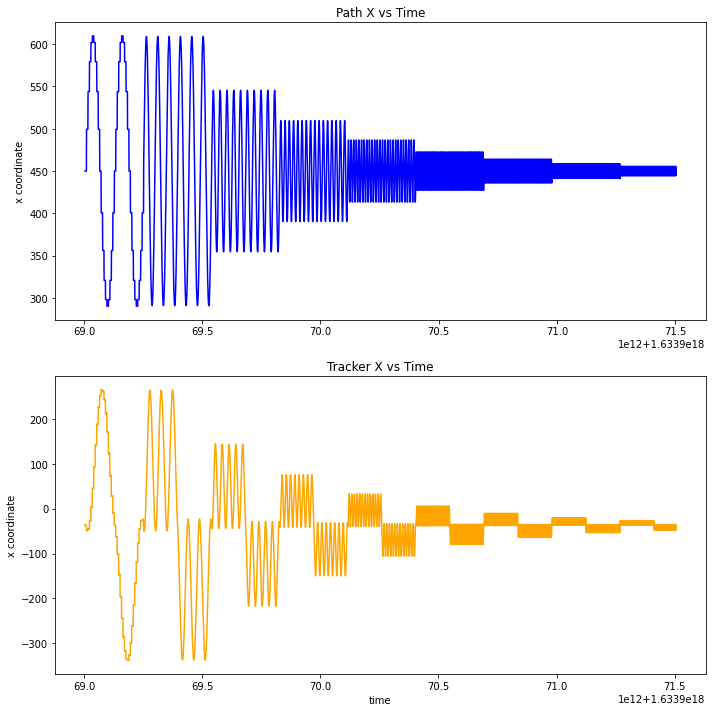

In [100]:
fig, ax = plt.subplots(2, 1, figsize=(10,10))

plt1 = ax[0]
plt1.plot(pth_t[:num_points], pth_x[:num_points], c='blue')
#plt1.set_xlabel('time')
plt1.set_ylabel('x coordinate')
plt1.set_title('Path X vs Time')

plt2 = ax[1]
plt2.plot(trk_t[:trk_num_points], trk_x[:trk_num_points], c='orange')
plt2.set_xlabel('time')
plt2.set_ylabel('x coordinate')
plt2.set_title('Tracker X vs Time')

plt.tight_layout()
plt.show()

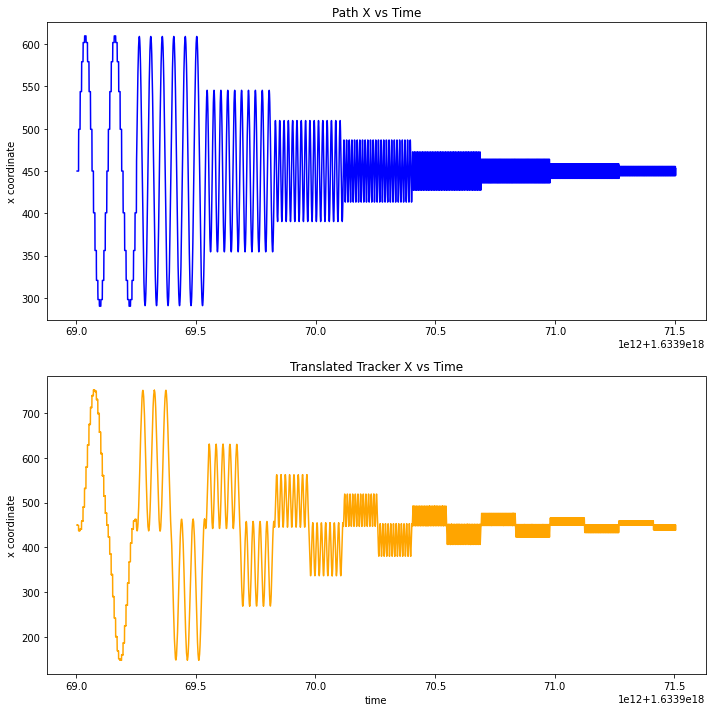

In [101]:
fig, ax = plt.subplots(2, 1, figsize=(10,10))

plt1 = ax[0]
plt1.plot(pth_t[:num_points], pth_x[:num_points], c='blue')
plt1.set_ylabel('x coordinate')
plt1.set_title('Path X vs Time')

plt2 = ax[1]
plt2.plot(trk_t[:trk_num_points], trk_x_t[:trk_num_points], c='orange')
plt2.set_xlabel('time')
plt2.set_ylabel('x coordinate')
plt2.set_title('Translated Tracker X vs Time')

plt.tight_layout()
plt.show()

# Y Coordinate

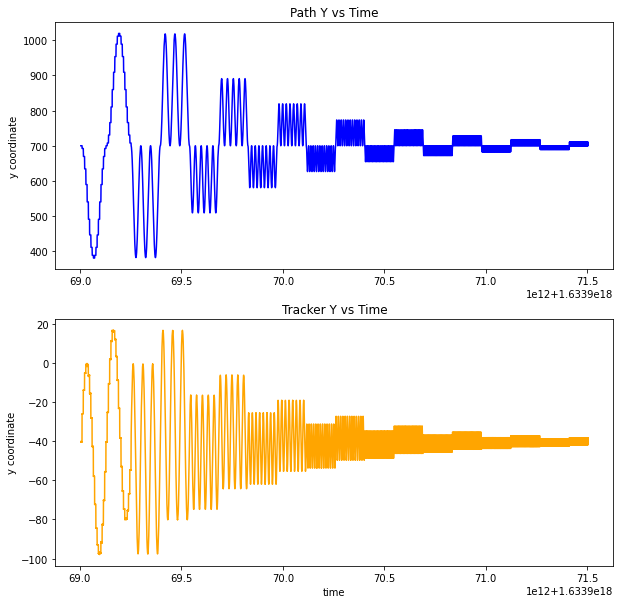

In [103]:
fig, ax = plt.subplots(2, 1, figsize=(10,10))

plt1 = ax[0]
plt1.plot(pth_t[:num_points], pth_y[:num_points], c='blue')
plt1.set_ylabel('y coordinate')
plt1.set_title("Path Y vs Time")

plt2 = ax[1]
plt2.plot(trk_t[:trk_num_points], trk_y[:trk_num_points], c='orange')
plt2.set_xlabel('time')
plt2.set_ylabel('y coordinate')
plt2.set_title("Tracker Y vs Time")
plt.show()

## both seem to be sinusodial in some sense, but are displaying quite different patterns
## tracker y looks oddly like path x tho

# Z Coordinate

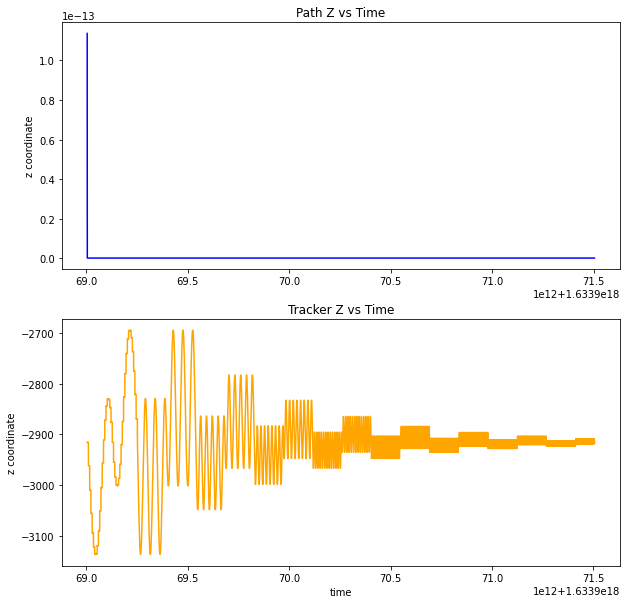

In [104]:
fig, ax = plt.subplots(2, 1, figsize=(10,10))

plt1 = ax[0]
plt1.plot(pth_t[:num_points], pth_z[:num_points], c='blue')
plt1.set_ylabel('z coordinate')
plt1.set_title("Path Z vs Time")

plt2 = ax[1]
plt2.plot(trk_t[:trk_num_points], trk_z[:trk_num_points], c='orange')
plt2.set_xlabel('time')
plt2.set_ylabel('z coordinate')
plt2.set_title("Tracker Z vs Time")
plt.show()

## absolutely no correlation,, why does tracker have z coordinate?? perhaps this is necessary when robot is in motion? 

# Other Correlations

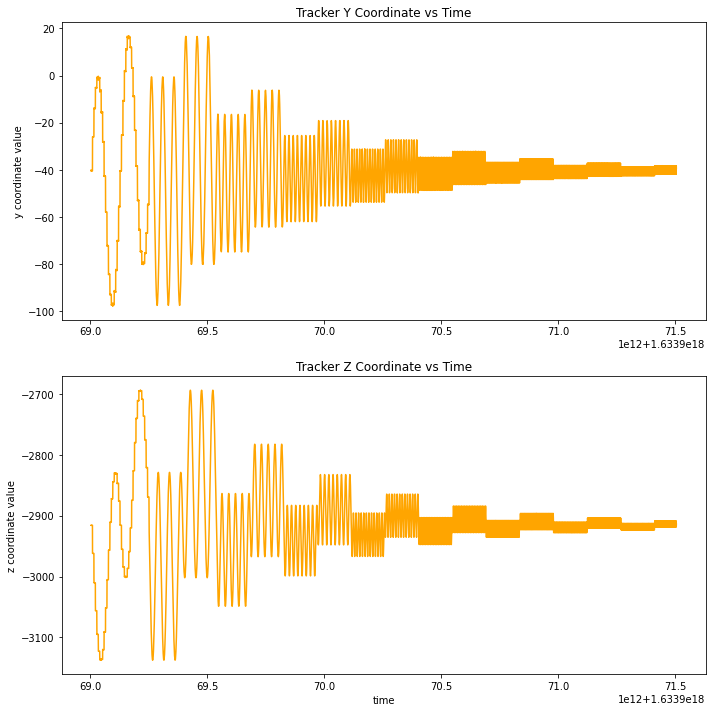

In [54]:
figure, axes = plt.subplots(2,1, figsize=(10,10))

plt1 = axes[0]
plt1.plot(trk_t[:trk_num_points], trk_y[:trk_num_points], c='orange')
#plt1.set_xlabel("time")
plt1.set_ylabel('y coordinate value')
plt1.set_title("Tracker Y Coordinate vs Time")


plt2 = axes[1]
plt2.plot(trk_t[:trk_num_points], trk_z[:trk_num_points], c='orange')
plt2.set_xlabel("time")
plt2.set_ylabel('z coordinate value')
plt2.set_title("Tracker Z Coordinate vs Time")

plt.tight_layout()
plt.show()
## these two plots show same exact trend

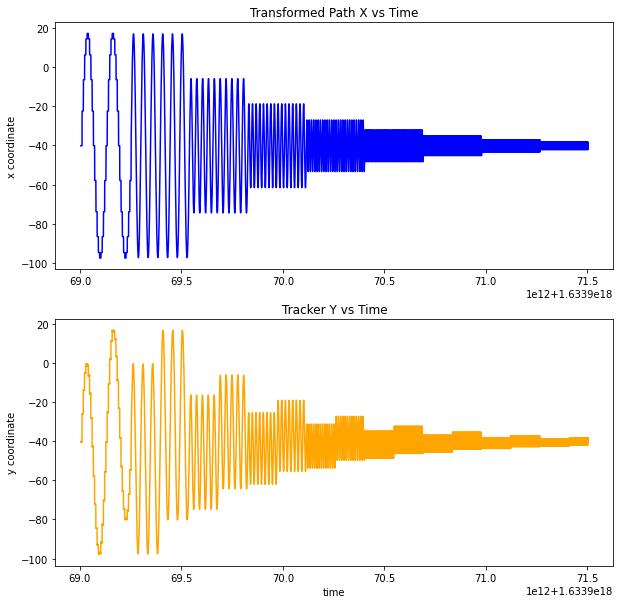

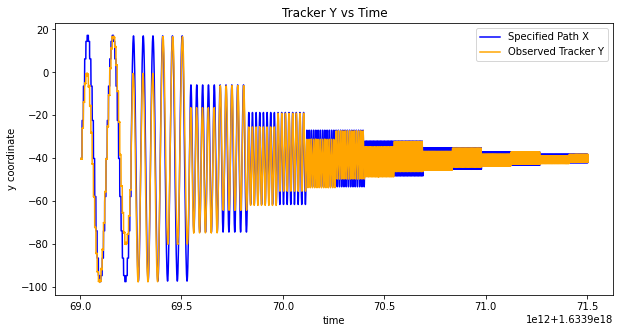

In [113]:
# first point of path y

range_pth = max(pth_x) - min(pth_x)
range_trk = max(trk_y) - min(trk_y)
rto = range_pth / range_trk

scaled_pth_x = pth_x[:num_points] / rto
first_point_diff = scaled_pth_x[0] - trk_y[0]
transformed_pth_x = scaled_pth_x - first_point_diff

fig, ax = plt.subplots(2, 1, figsize=(10,10))

plt1 = ax[0]
plt1.plot(pth_t[:num_points], transformed_pth_x[:num_points], c='blue')
plt1.set_ylabel('x coordinate')
plt1.set_title("Transformed Path X vs Time")

plt2 = ax[1]
plt2.plot(trk_t[:trk_num_points], trk_y[:trk_num_points], c='orange')
plt2.set_xlabel('time')
plt2.set_ylabel('y coordinate')
plt2.set_title("Tracker Y vs Time")
plt.show()


fig, ax = plt.subplots(1, 1, figsize=(10,5))

ax.plot(pth_t[:num_points], transformed_pth_x[:num_points], c='blue', label='Specified Path X')
ax.plot(trk_t[:trk_num_points], trk_y[:trk_num_points], c='orange', label='Observed Tracker Y')
ax.set_xlabel('time')
ax.set_ylabel('y coordinate')
ax.set_title("Tracker Y vs Time")
ax.legend()
plt.show()


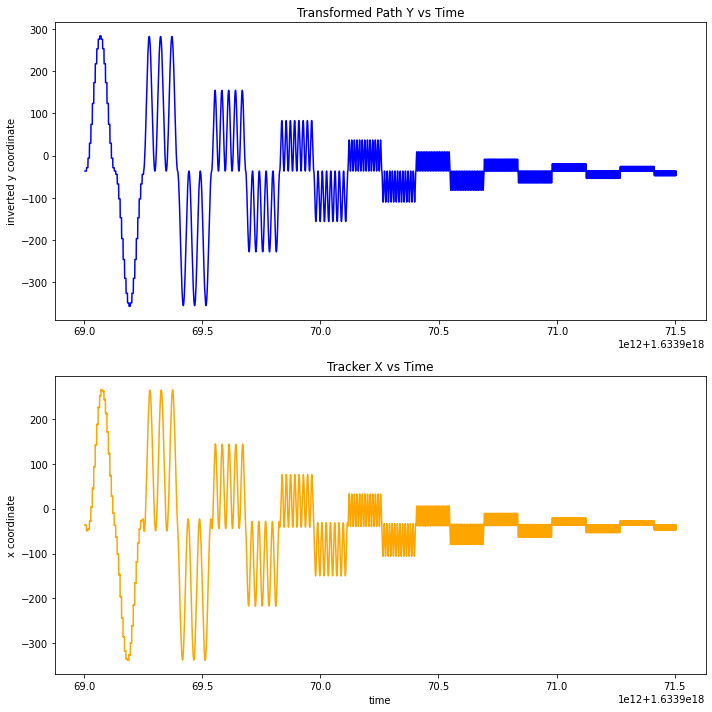

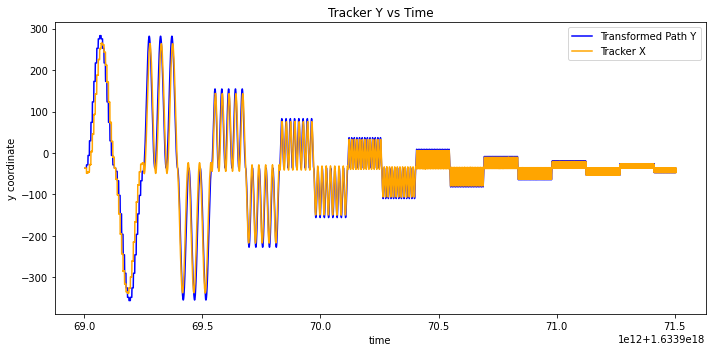

In [112]:
# first point of path y
range_pth = max(pth_y) - min(pth_y)
range_trk = max(trk_y) - min(trk_y)
rto = range_pth / range_trk

scaled_pth_x = pth_x[:num_points] / rto
first_point_diff = scaled_pth_x[0] - trk_y[0]
transformed_pth_x = scaled_pth_x - first_point_diff

first_point_diff = -1*pth_y[0] - trk_x[0]

transformed_pth_y = -1*pth_y[:num_points] - first_point_diff

fig, ax = plt.subplots(2, 1, figsize=(10,10))

plt1 = ax[0]
plt1.plot(pth_t[:num_points], transformed_pth_y, c='blue')
plt1.set_ylabel('inverted y coordinate')
plt1.set_title("Transformed Path Y vs Time")

plt2 = ax[1]
plt2.plot(trk_t[:trk_num_points], trk_x[:trk_num_points], c='orange')
plt2.set_xlabel('time')
plt2.set_ylabel('x coordinate')
plt2.set_title("Tracker X vs Time")
plt.tight_layout()
plt.show()


fig, ax = plt.subplots(1, 1, figsize=(10,5))

ax.plot(pth_t[:num_points], transformed_pth_y, c='blue', label='Transformed Path Y')
ax.plot(trk_t[:trk_num_points], trk_x[:trk_num_points], c='orange', label='Tracker X')
ax.set_xlabel('time')
ax.set_ylabel('y coordinate')
ax.set_title("Tracker Y vs Time")
ax.legend()
plt.tight_layout()
plt.show()

# Zoomed In

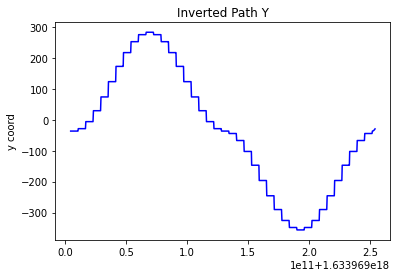

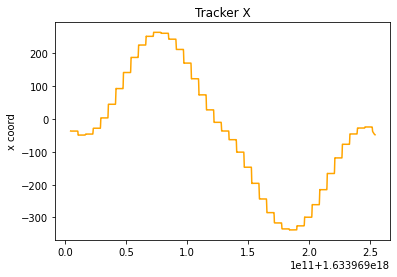

41.88627525280799


In [17]:
# first point of path y
first_point_diff = -1*pth_y_m[0] - trk_x_m[0]

transformed_pth_y_m = -1*pth_y_m[:num_points] - first_point_diff

plt.plot(pth_t_m[:num_points], transformed_pth_y_m, c='blue')
plt.ylabel('y coord')
plt.title("Inverted Path Y")
plt.show()

plt.plot(trk_t_m[:num_points], trk_x_m[:num_points], c='orange')
plt.ylabel('x coord')
plt.title("Tracker X")
plt.show()


print(mae(transformed_pth_y_m, trk_x_m[:num_points]))

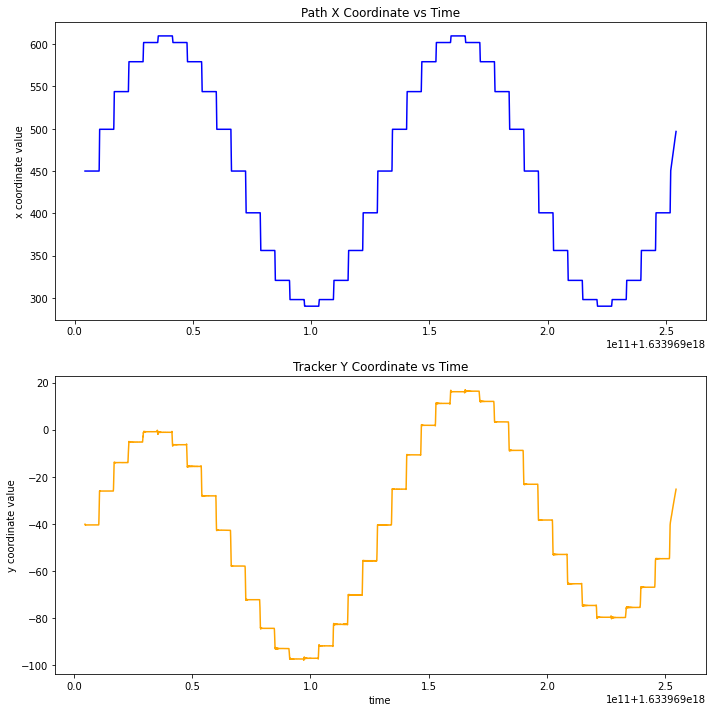

Range of Path X:
Max value:  609.8113305374916
Min value:  290.18866946250847
Range:  319.6226610749831

Range of Tracker Y:
Max value:  16.84531593322754
Min value:  -97.96622467041016
Range:  114.8115406036377


In [18]:
figure, axes = plt.subplots(2,1, figsize=(10,10))

plt1 = axes[0]
plt1.plot(pth_t[:num_points], pth_x[:num_points], c='blue')
#plt1.set_xlabel("time")
plt1.set_ylabel('x coordinate value')
plt1.set_title("Path X Coordinate vs Time")

plt2 = axes[1]
plt2.plot(trk_t[:trk_num_points], trk_y[:trk_num_points], c='orange')
plt2.set_xlabel("time")
plt2.set_ylabel('y coordinate value')
plt2.set_title("Tracker Y Coordinate vs Time")

plt.tight_layout()
plt.show()

print("Range of Path X:")
print("Max value: ", max(pth_x[:num_points]))
print("Min value: ", min(pth_x[:num_points]))
print("Range: ", max(pth_x[:num_points]) - min(pth_x[:num_points]))

print("\nRange of Tracker Y:")
print("Max value: ", max(trk_y[:trk_num_points]))
print("Min value: ", min(trk_y[:trk_num_points]))
print("Range: ", max(trk_y[:trk_num_points]) - min(trk_y[:trk_num_points]))

# Path Followed vs Time

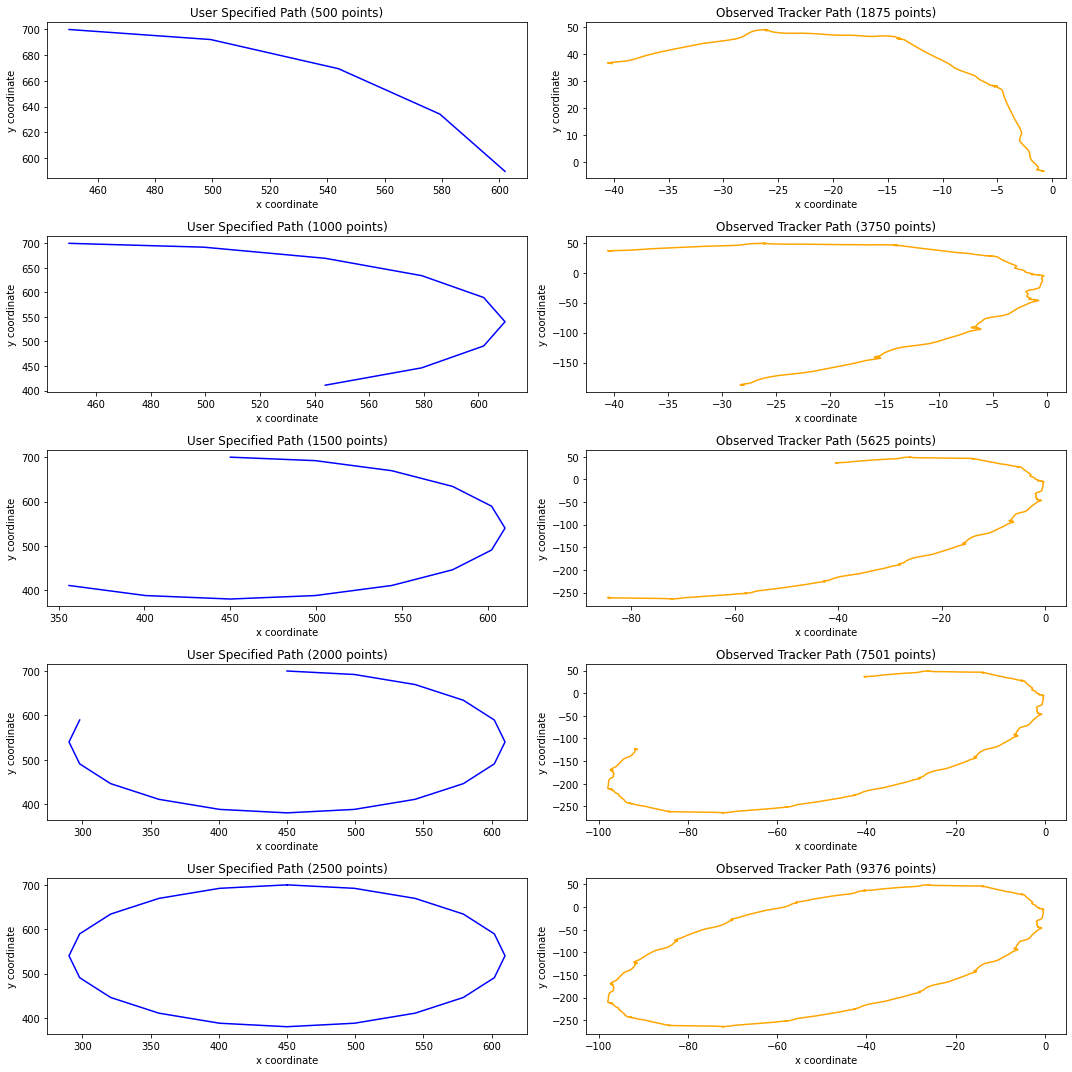

In [122]:

fig, ax = plt.subplots(5,2, figsize=(15,15))

for i in range(0, 5):
    num_points = 500*i + 500
    plt0 = ax[i][0]
    plt0.plot(pth_x[:num_points], pth_y[:num_points], c='blue')
    plt0.set_xlabel("x coordinate")
    plt0.set_ylabel('y coordinate')
    title0 =  "User Specified Path (" + str(num_points) + " points)"
    plt0.set_title(title0)

    trk_num_points = round(num_points*size_ratio)
    plt1 = ax[i][1]
    plt1.plot(trk_y[:trk_num_points], -trk_x[:trk_num_points], c='orange')
    plt1.set_xlabel("x coordinate")
    plt1.set_ylabel('y coordinate')
    title1 = "Observed Tracker Path (" + str(trk_num_points) + " points)"
    plt1.set_title(title1)

plt.tight_layout()
plt.show()

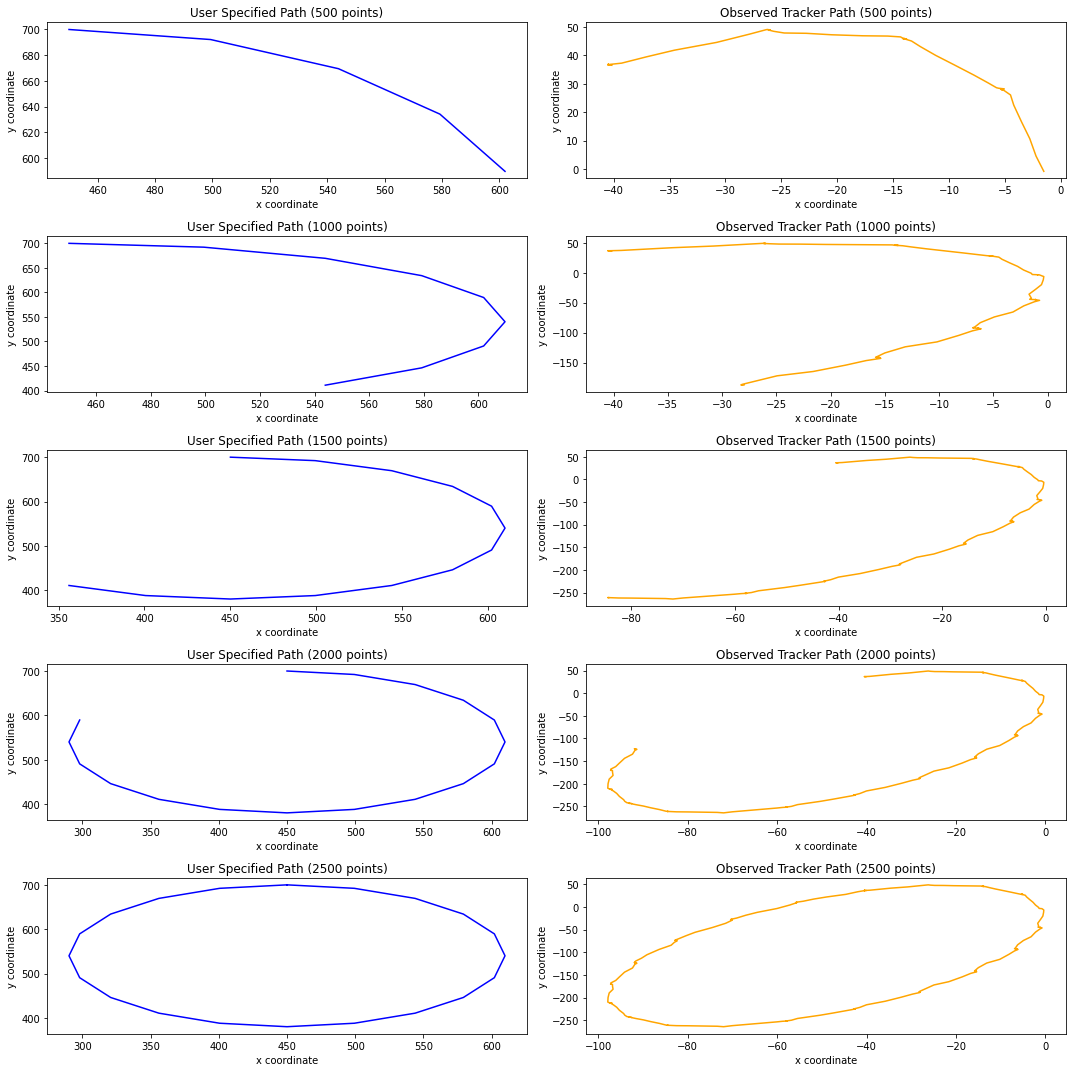

In [123]:

fig, ax = plt.subplots(5,2, figsize=(15,15))

for i in range(0, 5):
    num_points = 500*i + 500
    plt0 = ax[i][0]
    plt0.plot(pth_x[:num_points], pth_y[:num_points], c='blue')
    plt0.set_xlabel("x coordinate")
    plt0.set_ylabel('y coordinate')
    title0 =  "User Specified Path (" + str(num_points) + " points)"
    plt0.set_title(title0)

    trk_num_points = round(num_points*size_ratio)
    plt1 = ax[i][1]
    plt1.plot(trk_y_m[:num_points], -trk_x_m[:num_points], c='orange')
    plt1.set_xlabel("x coordinate")
    plt1.set_ylabel('y coordinate')
    title1 = "Observed Tracker Path (" + str(num_points) + " points)"
    plt1.set_title(title1)

plt.tight_layout()
plt.show()